In [47]:
# Imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

#cargamos los datos de entrada
df = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_iter2.csv",index_col=0,sep=",")
#veamos cuantas dimensiones y registros contiene

## Descripción básica del dataset

In [48]:
df.head(5)

,hors,ws,wd,anno,mes,dia,horsObs,wp1
4,5,2.93,120.13,2009,7,1,0,0.035
5,6,2.96,115.79,2009,7,1,0,0.005
6,7,2.81,106.71,2009,7,1,0,0.251
7,8,2.73,95.39,2009,7,1,0,0.251
8,9,2.87,88.50,2009,7,1,0,0.010


## Descripción filas y columnas

In [49]:
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (86796, 8)
Nombre columnas: Index(['hors', 'ws', 'wd', 'anno', 'mes', 'dia', 'horsObs', 'wp1'], dtype='object')


## Columnas, tipo de datos y nulos

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86796 entries, 4 to 104831
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   hors     86796 non-null  int64  
 1   ws       86796 non-null  float64
 2   wd       86796 non-null  float64
 3   anno     86796 non-null  int64  
 4   mes      86796 non-null  int64  
 5   dia      86796 non-null  int64  
 6   horsObs  86796 non-null  int64  
 7   wp1      86796 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 6.0 MB


## Descripción estadística de los datos numéricos

In [51]:
df.describe()

,hors,ws,wd,anno,mes,dia,horsObs,wp1
count,86796.000000,86796.000000,86796.000000,86796.000000,86796.000000,86796.000000,86796.000000,86796.000000
mean,27.528619,4.071647,144.577414,2010.402415,6.632333,15.693903,5.998617,0.273715
std,12.629649,1.890125,93.525744,0.951188,3.451679,8.786608,6.000034,0.201570
min,5.000000,0.010000,0.020000,2009.000000,1.000000,1.000000,0.000000,0.005000
25%,17.000000,2.750000,72.687500,2010.000000,4.000000,8.000000,0.000000,0.135000
50%,28.000000,3.680000,122.350000,2010.000000,7.000000,16.000000,0.000000,0.252000
75%,39.000000,5.110000,196.615000,2011.000000,10.000000,23.000000,12.000000,0.316000
max,48.000000,15.810000,359.990000,2012.000000,12.000000,31.000000,12.000000,0.947000


## Correlación entre variables

In [52]:
df.corr()

,hors,ws,wd,anno,mes,dia,horsObs,wp1
hors,1.000000,-0.020356,-0.002982,7.915774e-02,-0.026680,-0.001025,1.063426e-04,0.000379
ws,-0.020356,1.000000,-0.157463,-3.490340e-04,-0.014751,0.021386,-2.524894e-02,0.511217
wd,-0.002982,-0.157463,1.000000,-2.560834e-02,-0.022130,0.041373,4.330486e-03,-0.143867
anno,0.079158,-0.000349,-0.025608,1.000000e+00,-0.454520,-0.012535,5.850031e-07,0.064721
mes,-0.026680,-0.014751,-0.022130,-4.545198e-01,1.000000,0.008967,-3.716856e-04,-0.034985
dia,-0.001025,0.021386,0.041373,-1.253453e-02,0.008967,1.000000,-4.695831e-04,-0.004901
horsObs,0.000106,-0.025249,0.004330,5.850031e-07,-0.000372,-0.000470,1.000000e+00,-0.006696
wp1,0.000379,0.511217,-0.143867,6.472121e-02,-0.034985,-0.004901,-6.696036e-03,1.000000


In [53]:
df.drop(['dia','horsObs','hors'], axis=1, inplace=True)
df.head(5)

,ws,wd,anno,mes,wp1
4,2.93,120.13,2009,7,0.035
5,2.96,115.79,2009,7,0.005
6,2.81,106.71,2009,7,0.251
7,2.73,95.39,2009,7,0.251
8,2.87,88.50,2009,7,0.010


In [54]:
df.corr()

,ws,wd,anno,mes,wp1
ws,1.000000,-0.157463,-0.000349,-0.014751,0.511217
wd,-0.157463,1.000000,-0.025608,-0.022130,-0.143867
anno,-0.000349,-0.025608,1.000000,-0.454520,0.064721
mes,-0.014751,-0.022130,-0.454520,1.000000,-0.034985
wp1,0.511217,-0.143867,0.064721,-0.034985,1.000000


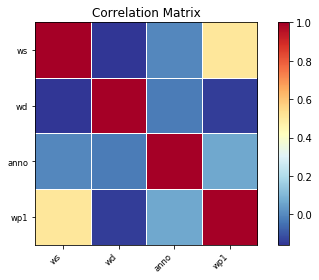

In [55]:
corr = df.set_index("mes").corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [56]:
nan_rows = df[df['wp1'].isnull()] 
nan_rows

,ws,wd,anno,mes,wp1


In [57]:
df2=df
#df2.drop(['anno','mes'], axis=1, inplace=True)
df2.head()

,ws,wd,anno,mes,wp1
4,2.93,120.13,2009,7,0.035
5,2.96,115.79,2009,7,0.005
6,2.81,106.71,2009,7,0.251
7,2.73,95.39,2009,7,0.251
8,2.87,88.50,2009,7,0.010


## Outliers

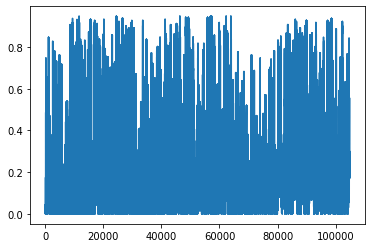

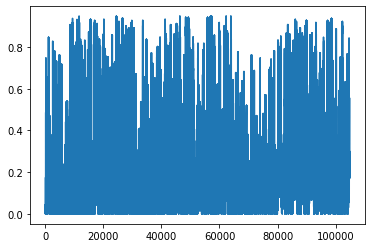

In [14]:
df.wp1.plot().get_figure()

In [15]:
def get_remov_outliers(y):
    #y = data['date']
    removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
    
    print(str(y[removed_outliers].size) + "/" + str(y.size) + " data points remain.") 
    print(removed_outliers.value_counts())
    
    
    return removed_outliers

In [16]:
def del_ouliers (rem_outl, df):
    index_names = df[~rem_outl].index # INVERT removed_outliers!!
    print(index_names) # The resulting 20 dates to drop.
    df.drop(index_names, inplace=True)

In [18]:
removed_outliers = get_remov_outliers(df['wd'])
del_ouliers(removed_outliers, df)
df.info()

70365/78178 data points remain.
True     70365
False     7813
Name: wd, dtype: int64
Int64Index([   760,    761,    762,    763,    764,    765,    766,    767,
               797,    798,
            ...
            104024, 104025, 104026, 104027, 104028, 104029, 104030, 104031,
            104032, 104476],
           dtype='int64', length=7813)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 70365 entries, 4 to 104830
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ws      70365 non-null  float64
 1   wd      70365 non-null  float64
 2   anno    70365 non-null  int64  
 3   mes     70365 non-null  int64  
 4   wp1     70365 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 3.2 MB


In [58]:

df.to_csv('/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin_iter2.csv')


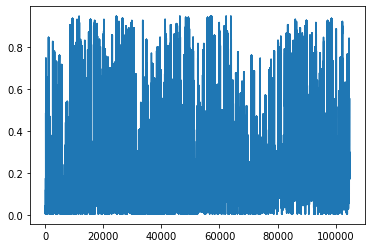

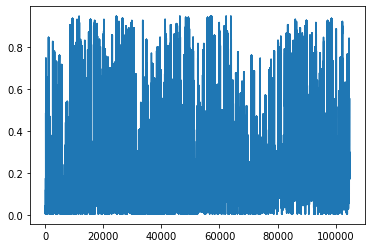

In [46]:
df.wp1.plot().get_figure()